# Argentinian Property Listings
In this project, we take the Argentinian Property Listings from [the Kaggle data set](https://www.kaggle.com/rmjacobsen/property-listings-for-5-south-american-countries) and attempt to create a regressor for the property price.

In [1]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [2]:
import pandas as pd

print( pd.__version__ )

0.24.2


In [3]:
import re

In [4]:
property_data = pd.read_csv( "C:\\Users\\rhopi\\OneDrive\\Desktop\\kaggle data 1\\property listings data set\\ar_properties.csv" )

property_data.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,7LoZFkSIPOTox0r32ck42Q==,Propiedad,2019-09-15,2019-10-26,2019-09-15,-26.815439,-65.312393,Argentina,Tucumán,Yerba Buena,...,NaN,NaN,NaN,NaN,NaN,Mensual,Terreno - Yerba Buena,Accesos pavimentados.<br>Red subterránea de ag...,Lote,Venta
1,QsZD4OxZInNd5po5LQDRmg==,Propiedad,2019-09-15,9999-12-31,2019-09-15,-26.839469,-65.212790,Argentina,Tucumán,NaN,...,1.0,55.0,41.0,NaN,NaN,Mensual,Departamento - Capital,Detalles constructivos:<br><br>Pisos de porcel...,Departamento,Venta
2,qDtysoUgbnHLp0W9We+8fg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.424820,-64.181225,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | San Lorenzo al 400,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
3,olj51zV0HFurmaZ78U0ssg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.421242,-64.190798,Argentina,Córdoba,Córdoba,...,1.0,48.0,48.0,NaN,NaN,Mensual,1 DORMITORIO | M. T. de Alvear al 500,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
4,OcS1SAA5oAzjZ3Mzg3XHyg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.426064,-64.180042,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | Av. Poeta Lugones al 200,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal


Obviously, we have to do some cleanup. Since we want to create a regressor for the price, we drop all the entries that have no price.

In [5]:
print( property_data.shape )

(1000000, 25)


In [6]:
property_data = property_data.dropna( subset = [ "price" ] )

property_data.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
20,jgIzAKLaljBee5xKVoCs3A==,Propiedad,2019-09-15,2020-03-15,2019-09-15,-34.643029,-58.368769,Argentina,Capital Federal,Barracas,...,NaN,NaN,NaN,35000.0,ARS,Mensual,PH 5 AMB CON AMPLIA TERRAZA Y BALCÓN,CODIGO: 4429-11 ubicado en: AVENIDA PATRICIOS ...,PH,Alquiler
21,kzR5ghTwqnCfkf1A1CU6HA==,Propiedad,2019-09-15,2019-09-21,2019-09-15,-34.476510,-58.534146,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,...,2.0,110.0,NaN,25000.0,ARS,Mensual,PH - Las Lomas-San Isidro,ALQUILER PH SIN EXPENSAS SAN ISIDRO Don Bosco...,PH,Alquiler
22,M60/Oh5ToxGELDNQHKASrQ==,Propiedad,2019-09-15,2019-10-29,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,2.0,190.0,160.0,45000.0,ARS,Mensual,Venta. Alquiler anual. Casa estilo moderno. 5...,"MAM (2). Hermosa casa diseñada en una planta, ...",Casa,Alquiler
23,pjPcCHWnjKcN05hNhI0ssg==,Propiedad,2019-09-15,2019-10-29,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,2.0,190.0,160.0,45000.0,ARS,Mensual,ALQUILER Casa estilo racionalista en una plan...,"MAM. Hermosa casa diseñada en una planta, con ...",Casa,Alquiler
24,0Py/8IGj4qZsfLk7lEgPvA==,Propiedad,2019-09-15,2019-09-17,2019-09-15,-31.431401,-64.225170,Argentina,Córdoba,Córdoba,...,1.0,40.0,40.0,7000.0,ARS,NaN,Consultorio en alquiler,"Consultorio ideal para centro de estética, pos...",Oficina,Alquiler


In [7]:
print( property_data.shape )

(951327, 25)


Now, we check, how many currencies there are.

In [8]:
print( property_data.groupby( [ "currency" ] ).size() )

currency
ARS    243595
PEN        62
USD    699509
UYU      2329
dtype: int64


Since __USD__ is the most common currency, we drop all the other currencies.

In [9]:
property_data = property_data[ property_data[ "currency" ] == "USD" ]

property_data = property_data.drop( [ "currency" ], axis = 1 )

property_data.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,title,description,property_type,operation_type
44,EWeY8jVhb8ielLeKtfibVw==,Propiedad,2019-09-15,2020-01-20,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,NaN,2.0,198.0,150.0,385000.0,Mensual,"Venta. Casa en una planta, 4 amb. con galería ...",MAM.(2) Hermosa propiedad en Barrio San Franci...,Casa,Venta
45,IrEeG8ewIcfLVGSb14kH1w==,Propiedad,2019-09-15,2020-01-20,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,NaN,2.0,198.0,150.0,385000.0,Mensual,Venta. Casa en una planta.Lote interno. Barrio...,MAM. Hermosa propiedad en Barrio San Francisco...,Casa,Venta
46,hPuiyAjuBI92uEQdFoY4Fw==,Propiedad,2019-09-15,9999-12-31,2019-09-15,-27.371199,-55.898454,Argentina,Misiones,Posadas,...,NaN,2.0,173.0,173.0,195000.0,Mensual,Casa - Posadas,Inmueble centrico ideal para Local comercial ...,Casa,Venta
47,9vIWv494LqC6crAkfpLeDg==,Propiedad,2019-09-15,2020-03-03,2019-09-15,NaN,NaN,Argentina,Santa Fe,Rosario,...,NaN,1.0,49.0,40.0,85000.0,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
48,aydrtgoZ/frzXDcV20McuA==,Propiedad,2019-09-15,2020-03-03,2019-09-15,-32.951146,-60.571979,Argentina,Entre Ríos,Victoria,...,NaN,1.0,49.0,40.0,85000.0,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta


Now, we split the data into a __train__ set and a __test__ set. We choose the ratio between these two to be $70:30$.

In [10]:
train = property_data.sample( frac = 0.7, random_state = 1234567890 )

test = property_data.drop( train.index )

Now, we drop the columns __id__, __start_date__, __end_date__ and __created_on__, since we assume the prices to be static.

In [11]:
train = train.drop( [ "id", "start_date", "end_date", "created_on" ], axis = 1 )

test = test.drop( [ "id", "start_date", "end_date", "created_on" ], axis = 1 )

Next, we find out, whether there are different __ad_type__s.

In [12]:
print( train.groupby( [ "ad_type" ] ).size() )

ad_type
Propiedad    489656
dtype: int64


Since there is only one __ad_type__, we can drop this information.

In [13]:
train = train.drop( [ "ad_type" ], axis = 1 )

test = test.drop( [ "ad_type" ], axis = 1 )

Next, we check the column __l1__.

In [14]:
print( train.groupby( [ "l1" ] ).size() )

l1
Argentina         476338
Brasil                21
Estados Unidos       502
Uruguay            12795
dtype: int64


We restrict ourselves to the data from __Argentina__.

In [15]:
train = train[ train[ "l1" ] == "Argentina" ]

train = train.drop( [ "l1" ], axis = 1 )

test = test[ test[ "l1" ] == "Argentina" ]

test = test.drop( [ "l1" ], axis = 1 )

Now, let's have a look at the __price_period__.

In [16]:
print( train.groupby( [ "price_period" ] ).size() )

price_period
Diario          5
Mensual    170205
Semanal        24
dtype: int64


We restrict ourselves to __Mensual__.

In [17]:
train = train[ train[ "price_period" ] == "Mensual" ]

train = train.drop( [ "price_period" ], axis = 1 )

test = test[ test[ "price_period" ] == "Mensual" ]

test = test.drop( [ "price_period" ], axis = 1 )

Let's have a look at the __operation_type__.

In [18]:
print( train.groupby( [ "operation_type" ] ).size() )

operation_type
Alquiler               4822
Alquiler temporal      3382
Venta                162001
dtype: int64


We restrict ourselves to __Venta__.

In [19]:
train = train[ train[ "operation_type" ] == "Venta" ]

train = train.drop( [ "operation_type" ], axis = 1 )

test = test[ test[ "operation_type" ] == "Venta" ]

test = test.drop( [ "operation_type" ], axis = 1 )

Next, we investigate the __property_type__.

In [20]:
print( train.groupby( [ "property_type" ] ).size() )

property_type
Casa               32177
Casa de campo        139
Cochera             1754
Departamento       62003
Depósito             515
Local comercial     4806
Lote               16160
Oficina             2553
Otro               34577
PH                  7317
dtype: int64


Now, we check, whether there are __NaN__ values in __property_type__.

In [21]:
print( pd.Series( train[ "property_type" ].isna().sum() ) )

0    0
dtype: int64


In [22]:
print( pd.Series( test[ "property_type" ].isna().sum() ) )

0    0
dtype: int64


Now, we add for each property type a new column to the dataframes.

In [23]:
train_size = train.shape[ 0 ]

test_size = test.shape[ 0 ]

In [24]:
property_types = train.groupby( [ "property_type" ] ).groups.keys()

print( property_types )

dict_keys(['Casa', 'Casa de campo', 'Cochera', 'Departamento', 'Depósito', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH'])


In [25]:
for group in property_types:
    
    train[ group ] = np.zeros( shape = [ train_size ], dtype = np.bool )
    
    train.loc[ train[ "property_type" ] == group, group ] = True
    
    test[ group ] = np.zeros( shape = [ test_size ], dtype = np.bool )
    
    test.loc[ test[ "property_type" ] == group, group ] = True
    
train = train.drop( [ "property_type" ], axis = 1 )

test = test.drop( [ "property_type" ], axis = 1 )

Next, we investigate __lat__ and __lon__.

In [26]:
mean_lat = np.nanmean( train[ "lat" ].to_numpy() )

mean_lon = np.nanmean( train[ "lon" ].to_numpy() )

Now, that we have computed the mean of __lon__ and __lat__, we replace the __NaN__ values in __lon__ and __lat__ with the means, and also, we add two new columns, __imp_lon__ and __imp_lat__, that tell, whether __lon__ and __lat__ where imputed with their means.

In [27]:
train[ "imp_lat" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train[ "imp_lon" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train.loc[ np.isnan( train[ "lat" ] ), "lat" ] = mean_lat

train.loc[ np.isnan( train[ "lat" ] ), "imp_lat" ] = True

train.loc[ np.isnan( train[ "lon" ] ), "lon" ] = mean_lat

train.loc[ np.isnan( train[ "lon" ] ), "imp_lon" ] = True

test[ "imp_lat" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test[ "imp_lon" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test.loc[ np.isnan( test[ "lat" ] ), "lat" ] = mean_lat

test.loc[ np.isnan( test[ "lat" ] ), "imp_lat" ] = True

test.loc[ np.isnan( test[ "lon" ] ), "lon" ] = mean_lat

test.loc[ np.isnan( test[ "lon" ] ), "imp_lon" ] = True

Now, we have a look at what columns we can work with next.

In [28]:
print( train.columns )

Index(['lat', 'lon', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'title',
       'description', 'Casa', 'Casa de campo', 'Cochera', 'Departamento',
       'Depósito', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH',
       'imp_lat', 'imp_lon'],
      dtype='object')


Let's have a look at __l2__.

In [29]:
print( train.groupby( [ "l2" ] ).size() )

l2
Bs.As. G.B.A. Zona Norte        27062
Bs.As. G.B.A. Zona Oeste        14400
Bs.As. G.B.A. Zona Sur          15291
Buenos Aires Costa Atlántica    28362
Buenos Aires Interior            3161
Capital Federal                 54496
Catamarca                          25
Chaco                              21
Chubut                            244
Corrientes                         20
Córdoba                          7008
Entre Ríos                        358
Formosa                             8
Jujuy                               9
La Pampa                          129
La Rioja                           13
Mendoza                           655
Misiones                          227
Neuquén                           885
Río Negro                         902
Salta                             159
San Juan                           66
San Luis                          393
Santa Cruz                         24
Santa Fe                         7566
Santiago Del Estero                18
Tierra De

We will also one hot encode these data.

In [30]:
l2_data = train.groupby( [ "l2" ] ).groups.keys()

In [31]:
for group in l2_data:
    
    train[ group ] = np.zeros( shape = [ train_size ], dtype = np.bool )
    
    train.loc[ train[ "l2" ] == group, group ] = True
    
    test[ group ] = np.zeros( shape = [ test_size ], dtype = np.bool )
    
    test.loc[ test[ "l2" ] == group, group ] = True
    
train = train.drop( [ "l2" ], axis = 1 )

test = test.drop( [ "l2" ], axis = 1 )

And now __l3__.

In [32]:
print( train.groupby( [ "l3" ] ).size() )

l3
9 de Julio                      2
Abasto                        190
Adolfo Alsina                   1
Aeroparque                      1
Agrelo                          1
Agronomía                     121
Agua de Oro                    11
Aguas Verdes                   16
Alicia                          2
Allen                           1
Almafuerte                      3
Almagro                      3439
Almirante Brown               742
Alta Gracia                    10
Aluminé                        12
Alvear                         88
Anisacate                       3
Apóstoles                       2
Arrecifes                       8
Arroyo Leyes                   18
Arroyo Seco                     2
Ascochinga                      1
Ataliva Roca                    2
Atlántida                       1
Avellaneda                   1019
Ayacucho                        6
Azul                           12
Añelo                          30
Bahía Blanca                  262
Balcarce   

Since there are many names that appear only once (confer "Zonda"), we drop this column.

In [33]:
train = train.drop( [ "l3" ], axis = 1 )

test = test.drop( [ "l3" ], axis = 1 )

Now __l4__.

In [34]:
print( train.groupby( [ "l4" ] ).size() )

l4
 Country Maschwitz Club                     22
9 de Abril                                   9
Abasto                                      66
Abbott                                       4
Abril Club de Campo                         50
Acacias Blancas                             23
Acassuso                                   207
Adrogué                                    372
Aero Country Club                            3
Agustín Mosconi                              1
Albanueva Barrio Cerrado                    52
Alberdi                                    135
Aldo Bonzi                                  12
Alejandro Korn                              14
Alejandro Petión                             6
Alem                                         6
Alfar                                        1
Alta Córdoba                               108
Altamira                                    10
Alto Los Cardales                            2
Altos de Hudson I                            7
Altos de H

We also drop this column.

In [35]:
train = train.drop( [ "l4" ], axis = 1 )

test = test.drop( [ "l4" ], axis = 1 )

__l5__.

In [36]:
print( train.groupby( [ "l5" ] ).size() )

l5
Barrio Barrancas del Lago        23
Barrio Cabos del Lago            12
Barrio El Golf                   99
Barrio El Yacht                  35
Barrio La Alameda                26
Barrio La Isla                   18
Barrio Lagos del Golf 1           7
Barrio Lagos del Golf 2          42
Barrio Las Caletas                9
Barrio Las Glorietas             24
Barrio Los Alisos                57
Barrio Los Castores              26
Barrio Los Lagos                 64
Barrio Los Sauces                39
Barrio Los Tilos                 48
Barrio Residencial Pacheco 1      1
Barrio Residencial Pacheco 2      2
BarrioPortezuelo                117
Enyoi                             2
Islas del Canal                  34
QBay Yacht                        2
dtype: int64


There must be many __NaN__ values in this column. That's why we drop this column as well.

In [37]:
train = train.drop( [ "l5" ], axis = 1 )

test = test.drop( [ "l5" ], axis = 1 )

__l6__.

In [38]:
print( pd.Series( train[ "l6" ].isna().sum() ) )

0    162001
dtype: int64


Since this column has only __NaN__ values, we can drop this one, too.

In [39]:
train = train.drop( [ "l6" ], axis = 1 )

test = test.drop( [ "l6" ], axis = 1 )

For the columns __rooms__, __bedrooms__, __bathrooms__, __surface_total__ and __surface_covered__, we perform the same considerations we performed for __lat__ and __lon__.

In [40]:
mean_rooms = np.nanmean( train[ "rooms" ].to_numpy() )

mean_bedrooms = np.nanmean( train[ "bedrooms" ].to_numpy() )

mean_bathrooms = np.nanmean( train[ "bathrooms" ].to_numpy() )

mean_surface_total = np.nanmean( train[ "surface_total" ].to_numpy() )

mean_surface_covered = np.nanmean( train[ "surface_covered" ].to_numpy() )

In [41]:
train[ "imp_rooms" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train[ "imp_bedrooms" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train[ "imp_bathrooms" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train[ "imp_surface_total" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train[ "imp_surface_covered" ] = np.zeros( shape = [ train_size ], dtype = np.bool )

train.loc[ np.isnan( train[ "rooms" ] ), "rooms" ] = mean_rooms

train.loc[ np.isnan( train[ "rooms" ] ), "imp_rooms" ] = True

train.loc[ np.isnan( train[ "bedrooms" ] ), "bedrooms" ] = mean_bedrooms

train.loc[ np.isnan( train[ "bedrooms" ] ), "imp_bedrooms" ] = True

train.loc[ np.isnan( train[ "bathrooms" ] ), "bathrooms" ] = mean_bathrooms

train.loc[ np.isnan( train[ "bathrooms" ] ), "imp_bathrooms" ] = True

train.loc[ np.isnan( train[ "surface_total" ] ), "surface_total" ] = mean_surface_total

train.loc[ np.isnan( train[ "surface_total" ] ), "imp_surface_total" ] = True

train.loc[ np.isnan( train[ "surface_covered" ] ), "surface_covered" ] = mean_surface_covered

train.loc[ np.isnan( train[ "surface_covered" ] ), "imp_surface_covered" ] = True

test[ "imp_rooms" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test[ "imp_bedrooms" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test[ "imp_bathrooms" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test[ "imp_surface_total" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test[ "imp_surface_covered" ] = np.zeros( shape = [ test_size ], dtype = np.bool )

test.loc[ np.isnan( test[ "rooms" ] ), "rooms" ] = mean_rooms

test.loc[ np.isnan( test[ "rooms" ] ), "imp_rooms" ] = True

test.loc[ np.isnan( test[ "bedrooms" ] ), "bedrooms" ] = mean_bedrooms

test.loc[ np.isnan( test[ "bedrooms" ] ), "imp_bedrooms" ] = True

test.loc[ np.isnan( test[ "bathrooms" ] ), "bathrooms" ] = mean_bathrooms

test.loc[ np.isnan( test[ "bathrooms" ] ), "imp_bathrooms" ] = True

test.loc[ np.isnan( test[ "surface_total" ] ), "surface_total" ] = mean_surface_total

test.loc[ np.isnan( test[ "surface_total" ] ), "imp_surface_total" ] = True

test.loc[ np.isnan( test[ "surface_covered" ] ), "surface_covered" ] = mean_surface_covered

test.loc[ np.isnan( test[ "surface_covered" ] ), "imp_surface_covered" ] = True

Next, we zoom in on the __title__ and the __description__.

In [42]:
print( train[ "title" ].iloc[ 0 ] )

Ambiente y medio


In [43]:
print( train[ "description" ].iloc[ 0 ] )

Departamento de un ambiente con patio, luminoso.  Posee cocina con ventilacion natural, heladera con frezzer, aire acondicionado, WiFi.   Sommiers dos plazas.  Baño completo con bañera.   Buena ubicación.  Buen estado. Disponibilidad y precios<br><br><br>1 dic.  2016 a 15 mar.  2017<br><br><br>  Ref#118592.


Since both columns contain text, we create a bag of words which contains the $1000$ most common words that appear in the __title__ and the __description__.

In [44]:
bag_of_words = {}

regex = re.compile( '[^a-zA-Z]' )

for sentence in train[ "title" ]:
    
    if sentence is not np.nan:
    
        sentence = regex.sub( " ", sentence )
    
        sentence = sentence.lower()
    
        list_of_items = sentence.split( " " )
    
        for item in list_of_items:
            
            if len( item ) > 1:
        
                if item not in bag_of_words:
            
                    bag_of_words[ item ] = 1
            
                else:
            
                    bag_of_words[ item ] = bag_of_words[ item ] + 1
            
for sentence in train[ "description" ]:
    
    if sentence is not np.nan:
    
        sentence = regex.sub( " ", sentence )
    
        sentence = sentence.lower()
    
        list_of_items = sentence.split( " " )
    
        for item in list_of_items:
        
            if len( item ) > 1:
        
                if item not in bag_of_words:
            
                    bag_of_words[ item ] = 1
            
                else:
            
                    bag_of_words[ item ] = bag_of_words[ item ] + 1

In [45]:
most_common_words = [ x for x, y in sorted( bag_of_words.items(), key = lambda x: x[ 1 ], reverse = True ) ][ 0 : 1000 ]

We now do the same with the most common words as we did with the __property_types__.

In [46]:
i = 0

bag_of_words = {}

for word in most_common_words:
    
    bag_of_words[ word ] = "word_" + str( i )
    
    i = i + 1

In [47]:
for i in range( 1000 ):
    
    mystr = "word_" + str( i )
    
    train[ mystr ] = np.zeros( shape = [ train_size ], dtype = np.bool )
    
    test[ mystr ] = np.zeros( shape = [ test_size ], dtype = np.bool )

In [48]:
for i in range( 1 ):
    
    sentence1 = train.iloc[ i ][ "title" ]
    
    sentence2 = train.iloc[ i ][ "description" ]
    
    if sentence1 is not np.nan:
        
        if sentence2 is not np.nan:
            
            sentence = sentence1 + " " + sentence2
            
        else:
            
            sentence = sentence1
            
    else:
        
        if sentence2 is not np.nan:
            
            sentence = sentence2
            
        else:
            
            sentence = ""       
    
    sentence = regex.sub( " ", sentence )
    
    sentence = sentence.lower()
    
    list_of_items = sentence.split( " " )
    
    for item in list_of_items:
            
        if item in bag_of_words:
                
            train.iloc[ i, train.columns.get_loc( bag_of_words[ item ] ) ] = True
            
for i in range( 1 ):
    
    sentence1 = test.iloc[ i ][ "title" ]
    
    sentence2 = test.iloc[ i ][ "description" ]
    
    if sentence1 is not np.nan:
        
        if sentence2 is not np.nan:
            
            sentence = sentence1 + " " + sentence2
            
        else:
            
            sentence = sentence1
            
    else:
        
        if sentence2 is not np.nan:
            
            sentence = sentence2
            
        else:
            
            sentence = ""       
    
    sentence = regex.sub( " ", sentence )
    
    sentence = sentence.lower()
    
    list_of_items = sentence.split( " " )
    
    for item in list_of_items:
            
        if item in bag_of_words:
                
            test.iloc[ i, test.columns.get_loc( bag_of_words[ item ] ) ] = True
            
train = train.drop( [ "description" ], axis = 1 )

train = train.drop( [ "title" ], axis = 1 )

test = test.drop( [ "description" ], axis = 1 )

test = test.drop( [ "title" ], axis = 1 )

Now we extract the __price__ data and transform these to numpy arrays.

In [49]:
train_y = train[ "price" ].to_numpy()

test_y = test[ "price" ].to_numpy()

In [50]:
train = train.drop( [ "price" ], axis = 1 )

test = test.drop( [ "price" ], axis = 1 )

In [51]:
train.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Casa de campo,Cochera,...,word_990,word_991,word_992,word_993,word_994,word_995,word_996,word_997,word_998,word_999
578191,-38.010888,-57.544739,3.198861,2.262446,1.000000,298.838959,167.251375,False,False,False,...,False,False,False,False,False,False,False,False,False,False
479135,-34.627721,-58.408429,3.198861,2.262446,1.716035,333.000000,167.251375,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539598,-38.008514,-57.540179,3.198861,2.262446,1.000000,298.838959,167.251375,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170980,-34.685002,-58.561532,3.198861,2.262446,1.716035,1102.000000,167.251375,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514679,-38.000979,-57.548079,3.198861,2.262446,1.000000,298.838959,167.251375,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
train_x = train.to_numpy()

test_x = test.to_numpy()

In order to evaluate the godness of fit, we use the $R^{2}$-value.

In [53]:
def rsquared( true, pred ):
    
    nominator = np.sum( np.square( true - pred ) )
    
    denominator = np.sum( np.square( true - np.mean( true ) ) )
    
    return 1 - nominator / denominator

We train a simple random forest.

In [54]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

print( sklearn.__version__ )

0.20.3


In [55]:
forest = RandomForestRegressor()

myforest = forest.fit( train_x, train_y )

C:\Users\rhopi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
pred_train = myforest.predict( train_x )

print( rsquared( train_y, pred_train ) )

0.8003076146717546


In [57]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


Text(0.5, 1.0, 'Training Data')

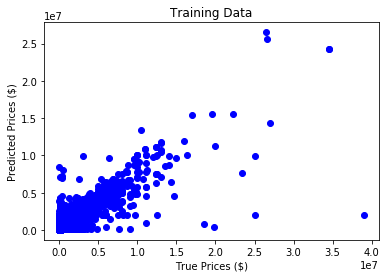

In [58]:
plt.plot( train_y, pred_train, "bo" )

plt.xlabel( "True Prices ($)" )

plt.ylabel( "Predicted Prices ($)" )

plt.title( "Training Data" )

Text(0.5, 1.0, 'Test Data')

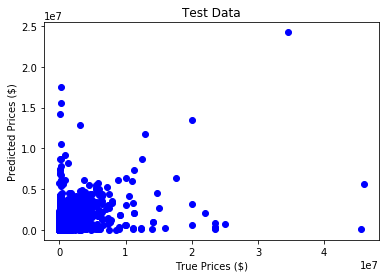

In [59]:
pred_test = myforest.predict( test_x )

plt.plot( test_y, pred_test, "bo" )

plt.xlabel( "True Prices ($)" )

plt.ylabel( "Predicted Prices ($)" )

plt.title( "Test Data" )

In [60]:
print( rsquared( test_y, pred_test ) )

0.29696359513446635


When we compare the performance on the test and the training data, we notice a huge drop. This means, that the model learnt to predict the training data pretty well, but cannot really generalize.<br>
We try to learn a model for Buenos Aires ($-34.603722, -58.381592$).

In [61]:
min_lat = -35

max_lat = -34

min_lon = -59

max_lon = -58

indices = []

for i in range( train_size ):
    
    if train_x[ i, 0 ] > min_lat:
        
        if train_x[ i, 0 ] < max_lat:
            
            if train_x[ i, 1 ] > min_lon:
                
                if train_x[ i, 1 ] < max_lon:
                    
                    indices.append( i )
                    
train_buenos_x = train_x[ indices, : ]

train_buenos_y = train_y[ indices ]

indices = []

for i in range( test_size ):
    
    if test_x[ i, 0 ] > min_lat:
        
        if test_x[ i, 0 ] < max_lat:
            
            if test_x[ i, 1 ] > min_lon:
                
                if test_x[ i, 1 ] < max_lon:
                    
                    indices.append( i )
                    
test_buenos_x = test_x[ indices, : ]

test_buenos_y = test_y[ indices ]

In [62]:
myforest_buenos = forest.fit( train_buenos_x, train_buenos_y )

In [63]:
pred_train_buenos = myforest_buenos.predict( train_buenos_x )

print( rsquared( train_buenos_y, pred_train_buenos ) )

0.9236505293136461


Text(0.5, 1.0, 'Training Data Buenos Aires')

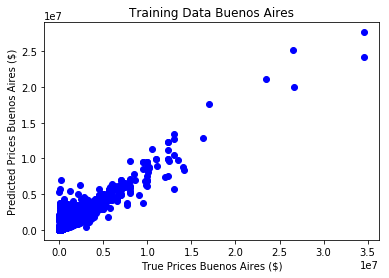

In [64]:
plt.plot( train_buenos_y, pred_train_buenos, "bo" )

plt.xlabel( "True Prices Buenos Aires ($)" )

plt.ylabel( "Predicted Prices Buenos Aires ($)" )

plt.title( "Training Data Buenos Aires" )

Text(0.5, 1.0, 'Test Data Buenos Aires')

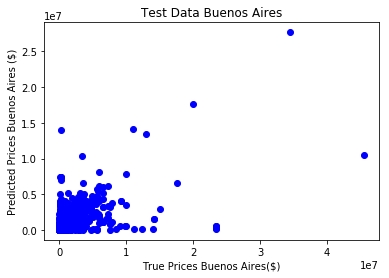

In [65]:
pred_test_buenos = myforest_buenos.predict( test_buenos_x )

plt.plot( test_buenos_y, pred_test_buenos, "bo" )

plt.xlabel( "True Prices Buenos Aires($)" )

plt.ylabel( "Predicted Prices Buenos Aires ($)" )

plt.title( "Test Data Buenos Aires" )

In [66]:
print( rsquared( test_buenos_y, pred_test_buenos ) )

0.4739209701945487


By restricting to the greater Buenos Aires area, we improved the performance on the training set significantly, and also the performance on the training set improved. However, the model is still not very good at generalization, which implies, that we need more data of that area.